# Datacamp: DR. SEMMELWEIS AND THE DISCOVERY OF HANDWASHING

<img src="ignaz_semmelweis.jpeg" width="250" align="left"/>
## 1. Dr. Ignaz Semmelweis
```
        This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the 
        Vienna General Hospital. If Dr.Semmelweis looks troubled it's probably because he's 
        thinking about childbed fever: A deadly disease affecting women that just have given
        birth. He is thinking about it because in the early 1840s at the Vienna General 
        Hospital as many as 10% of the women giving birth die from it. He is thinking 
        about it because he knows the cause of childbed fever: It's the contaminated hands
        of the doctors delivering the babies. And they won't listen to him and wash their
        hands!
```
```
        In this notebook, we're going to reanalyze the data that made Semmelweis discover 
        the importance of handwashing. Let's start by looking at the data that made
        Semmelweis realize that something was wrong with the procedures at Vienna 
        General Hospital.
```

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yearly="Datasets/yearly_deaths_by_clinic.csv"
monthly="Datasets/monthly_deaths.csv"

In [3]:
yearly_DF=pd.read_csv(yearly)
yearly_DF

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


#### The alarming number of deaths
```
The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.
```
```
We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.
```

In [4]:
yearly_DF["proportion_deaths"]=yearly_DF['deaths']/yearly_DF['births']
yearly1=yearly_DF[yearly_DF.clinic=='clinic 1']
yearly1
yearly2=yearly_DF[yearly_DF.clinic=='clinic 2']

yearly2

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


#### Death at the clinics
```If we now plot the proportion of deaths at both clinic 1 and clinic 2 we'll see a curious pattern...```

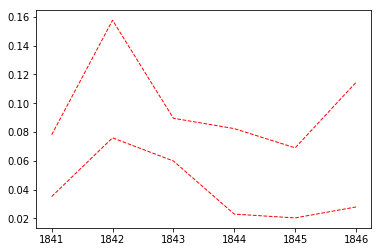

In [5]:
plt.plot(yearly1.year,yearly1.proportion_deaths,'b',linestyle = '--',color='red', linewidth=1)
plt.plot(yearly2.year,yearly2.proportion_deaths,'b',linestyle = '--',color='red', linewidth=1)

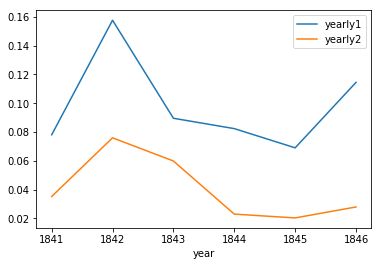

In [6]:
ax=yearly1.plot(x='year',y='proportion_deaths',label='yearly1')
yearly2.plot(x='year',y='proportion_deaths', label='yearly2', ax=ax)

#### The handwashing begins
```
Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled 
and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly
midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.
```
```
Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.
```
```
Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.
```

In [7]:
monthly_df=pd.read_csv(monthly, parse_dates=["date"])
monthly_df["proportion_deaths"]=monthly_df["deaths"]/monthly_df["births"]

In [8]:
monthly_df.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


#### The effect of handwashing
```
With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!
```

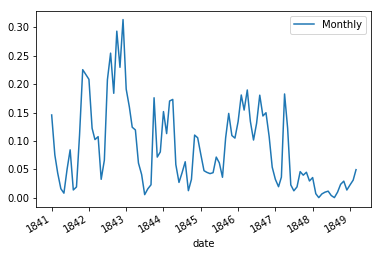

In [9]:
# Plot monthly proportion of deaths
# Plot yearly proportion of deaths at the two clinics
ax=monthly_df.plot(x='date',y='proportion_deaths',label='Monthly')

#### The effect of handwashing highlighted
```
Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.
```
```
The effect of handwashing is made even more clear if we highlight this in the graph.
```

In [10]:
handwashing_start = pd.to_datetime('1847-06-01')

In [11]:
before_washing_df =monthly_df[monthly_df.date<handwashing_start]
after_washing_df= monthly_df[monthly_df.date>=handwashing_start] 

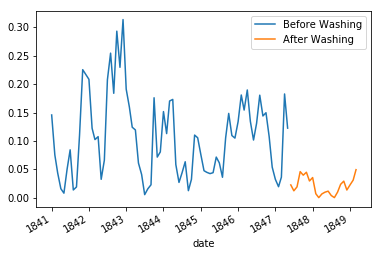

In [12]:
ax=before_washing_df.plot(x='date',y='proportion_deaths',label='Before Washing')
after_washing_df.plot(x='date',y='proportion_deaths',label='After Washing',ax=ax)

#### More handwashing, fewer deaths?
```
Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on
average?
```

In [19]:
before_proportion = before_washing_df.proportion_deaths
after_proportion = after_washing_df.proportion_deaths
print("before proportion:\n"+ str(before_proportion))
print("after proportion:\n"+ str(after_proportion))
mean_diff = np.mean(after_proportion) - np.mean(before_proportion)
mean_diff

before proportion:
0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
5     0.050000
6     0.084211
7     0.013514
8     0.018779
9     0.110169
10    0.225532
11    0.208469
12    0.122186
13    0.102273
14    0.107438
15    0.032258
16    0.065934
17    0.207792
18    0.254630
19    0.183857
20    0.293388
21    0.229665
22    0.313808
23    0.191176
24    0.159696
25    0.124060
26    0.119298
27    0.060976
28    0.040816
29    0.005236
        ...   
46    0.105469
47    0.075908
48    0.047445
49    0.044521
50    0.042308
51    0.043919
52    0.071429
53    0.061224
54    0.035857
55    0.105485
56    0.148410
57    0.109434
58    0.104869
59    0.133929
60    0.180887
61    0.154341
62    0.189723
63    0.134426
64    0.101504
65    0.130952
66    0.180556
67    0.143911
68    0.149606
69    0.107744
70    0.053691
71    0.032154
72    0.019231
73    0.036066
74    0.182692
75    0.122449
Name: proportion_deaths, Length: 76, dtype: float64
after proporti

-0.0839566075118334

#### A Bootstrap analysis of Semmelweis handwashing data
```
It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards).
```
```
To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).
```